## Installing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Pradyumn Sharma\Downloads\kaam\thoda\ml\Heart_dieses\heart_attack_dataset.csv")

In [3]:
df.head(5)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

In [7]:
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

C:\Users\Pradyumn Sharma\AppData\Local\Temp\ipykernel_18940\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
Age,1.000000,-0.003303,0.001661
Blood Pressure (mmHg),-0.003303,1.000000,0.044316
Cholesterol (mg/dL),0.001661,0.044316,1.000000


## Encoding categorical features

In [10]:
label_encoder = LabelEncoder()
df['Has Diabetes'] = label_encoder.fit_transform(df['Has Diabetes'])
df['Smoking Status'] = label_encoder.fit_transform(df['Smoking Status'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Chest Pain Type'] = label_encoder.fit_transform(df['Chest Pain Type'])
df['Treatment'] = label_encoder.fit_transform(df['Treatment'])

## Feature engineering: Binning Age

In [11]:
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_cut'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

## Feature Engineering: Binning Blood Pressure

In [12]:
bins2 = [0, 120, 130, 140, 180, 200]
labels2 = ['Normal', 'Pre-Hypertension', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
df['BP_cut'] = pd.cut(df['Blood Pressure (mmHg)'], bins=bins2, labels=labels2)

## Feature Engineering: Binning Cholesterol

In [13]:
bins3 = [0, 200, 240]
labels3 = ['Normal', 'High']
df['Cholesterol_cut'] = pd.cut(df['Cholesterol (mg/dL)'], bins=bins3, labels=labels3)

In [14]:
df.drop(columns=['Blood Pressure (mmHg)', 'Cholesterol (mg/dL)'], inplace=True)

In [15]:
df.head()

,Gender,Age,Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Age_cut,BP_cut,Cholesterol_cut
0,1,70,0,2,3,2,70-79,Hypertensive Crisis,NaN
1,0,55,1,2,1,0,50-59,Normal,NaN
2,1,42,1,0,3,0,40-49,Normal,NaN
3,1,84,0,2,1,1,NaN,Normal,NaN
4,1,86,1,0,2,3,NaN,Hypertensive Crisis,NaN


In [16]:
df.head(10)

,Gender,Age,Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Age_cut,BP_cut,Cholesterol_cut
0,1,70,0,2,3,2,70-79,Hypertensive Crisis,NaN
1,0,55,1,2,1,0,50-59,Normal,NaN
2,1,42,1,0,3,0,40-49,Normal,NaN
3,1,84,0,2,1,1,NaN,Normal,NaN
4,1,86,1,0,2,3,NaN,Hypertensive Crisis,NaN
5,0,66,1,1,3,1,60-69,Pre-Hypertension,NaN
6,1,33,1,0,0,2,30-39,Hypertensive Crisis,NaN
7,1,84,0,0,2,2,NaN,Hypertensive Crisis,NaN
8,1,73,1,2,0,0,70-79,Normal,NaN
9,0,63,1,1,2,0,60-69,Hypertension Stage 2,NaN


## Exploratory Data Analysis (EDA)

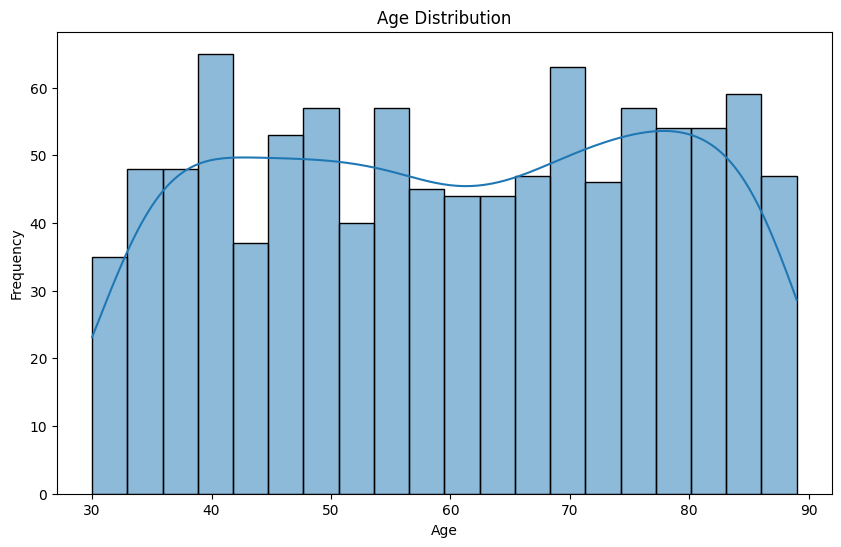

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

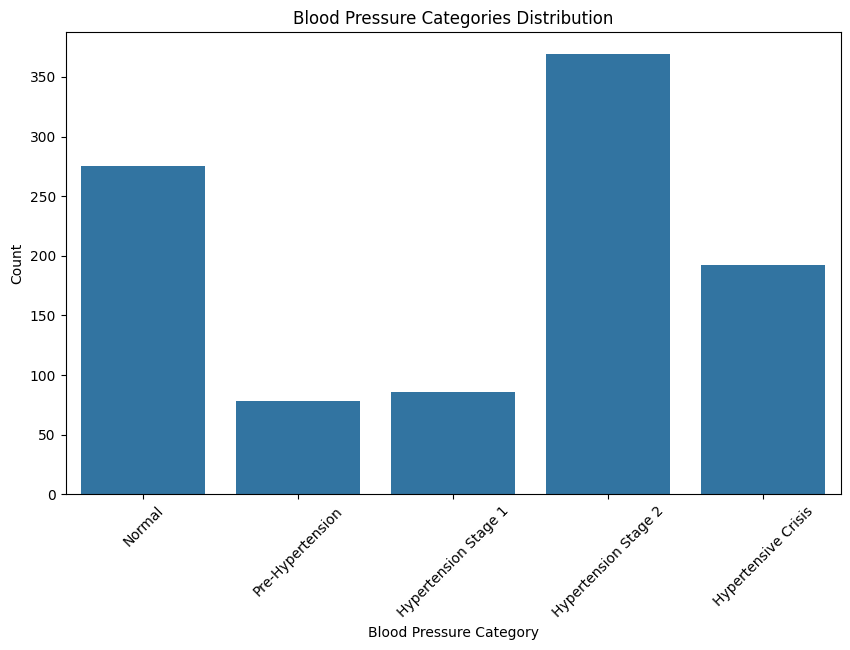

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BP_cut')
plt.title('Blood Pressure Categories Distribution')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

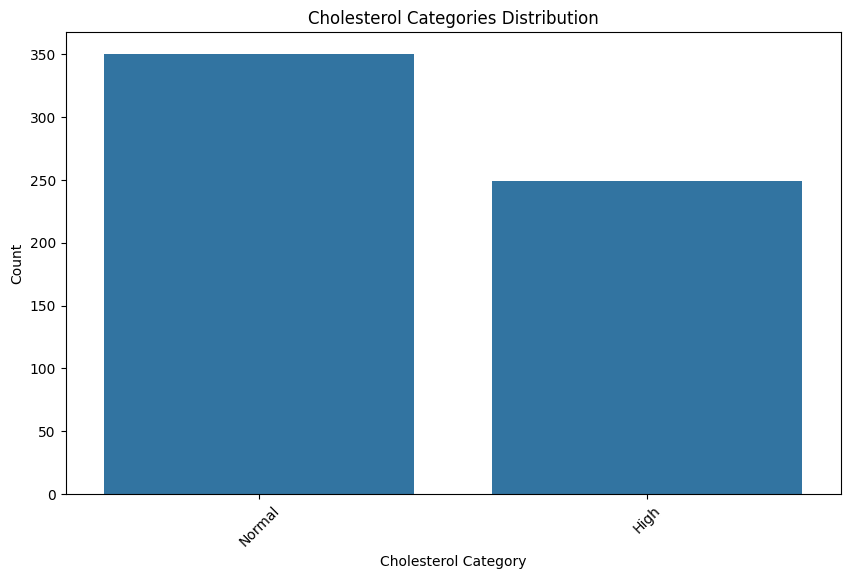

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cholesterol_cut')
plt.title('Cholesterol Categories Distribution')
plt.xlabel('Cholesterol Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

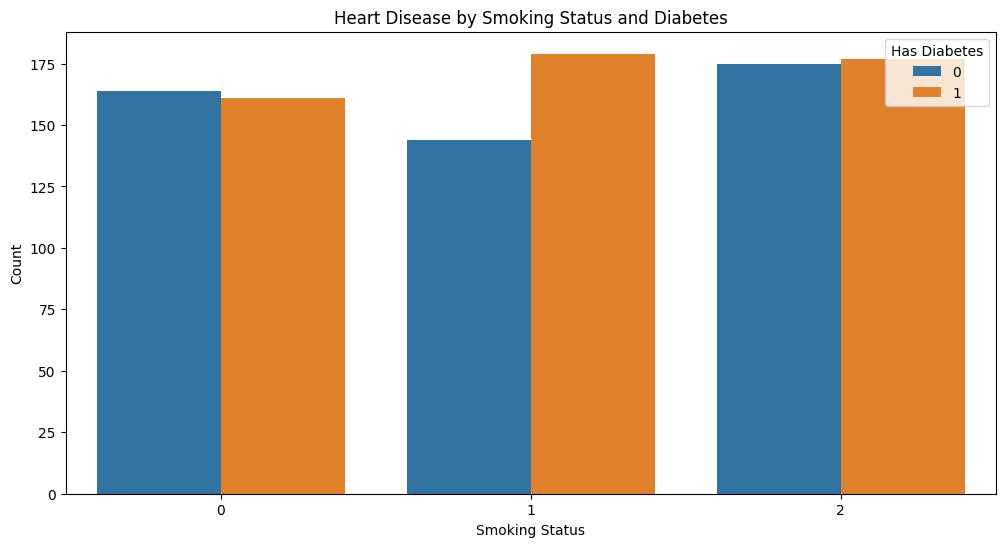

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Smoking Status', hue='Has Diabetes')
plt.title('Heart Disease by Smoking Status and Diabetes')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

C:\Users\Pradyumn Sharma\AppData\Local\Temp\ipykernel_18940\17502644.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


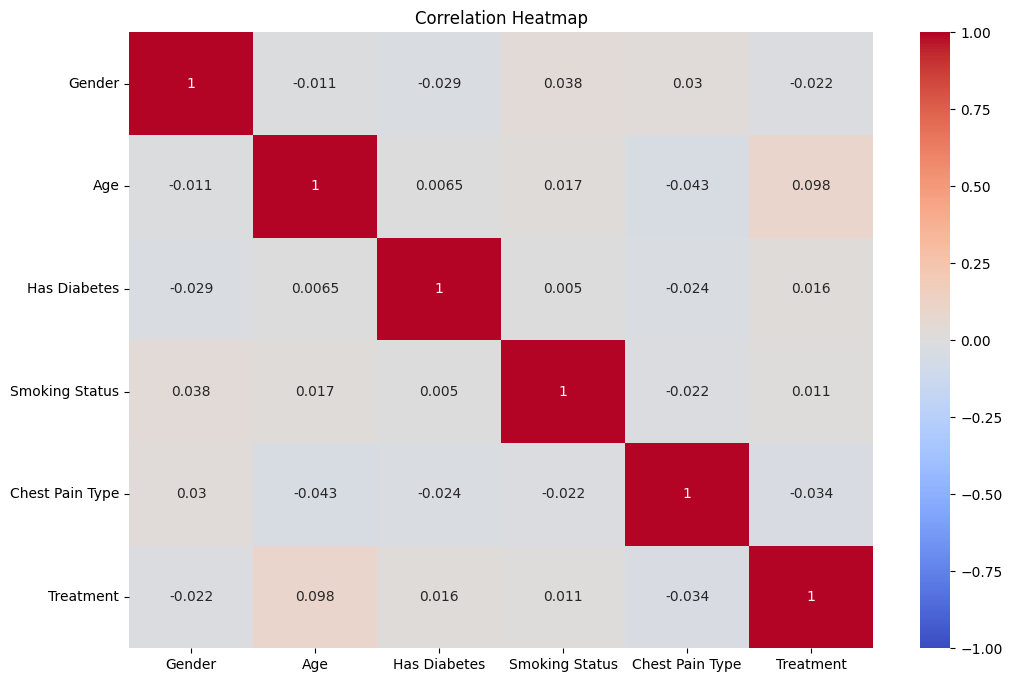

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Summary of the Analysis

#### **1. Data Loading and Initial Inspection:**
- The dataset was successfully loaded, and the initial inspection involved checking the first few rows, shape, info, missing values, descriptive statistics, duplicated rows, and correlations between variables.
- The dataset is assumed to contain various features related to heart health, including age, blood pressure, cholesterol levels, smoking status, diabetes status, gender, chest pain type, and treatment outcomes.

#### **2. Data Preprocessing:**
- **Encoding Categorical Features:** 
  - Categorical features such as `Has Diabetes`, `Smoking Status`, `Gender`, `Chest Pain Type`, and `Treatment` were encoded using `LabelEncoder`.
- **Feature Engineering:**
  - **Binning Age:** The age column was binned into five age groups: `30-39`, `40-49`, `50-59`, `60-69`, and `70-79`.
  - **Binning Blood Pressure:** Blood pressure was categorized into five groups: `Normal`, `Pre-Hypertension`, `Hypertension Stage 1`, `Hypertension Stage 2`, and `Hypertensive Crisis`.
  - **Binning Cholesterol:** Cholesterol levels were categorized into two groups: `Normal` and `High`.
- **Dropping Original Columns:**
  - After creating categorical versions of blood pressure and cholesterol, the original columns were dropped from the dataset.

#### **3. Exploratory Data Analysis (EDA):**
- **Age Distribution:**
  - A histogram with a kernel density estimate (KDE) was plotted to visualize the distribution of age in the dataset.
- **Blood Pressure Categories Distribution:**
  - A count plot was used to show the distribution of blood pressure categories, with the majority falling within specific ranges.
- **Cholesterol Categories Distribution:**
  - A count plot was used to display the distribution of cholesterol categories, indicating how many people fell into each category.
- **Heart Disease by Smoking Status and Diabetes:**
  - A count plot was generated to explore the relationship between smoking status and diabetes, in relation to heart disease.
- **Correlation Heatmap:**
  - A heatmap was plotted to visualize the correlation between different numerical variables in the dataset, helping identify potential relationships between features.
